## Análise de Consumo de Energia Residencial

Este notebook realiza uma análise exploratória de dados de consumo de energia residencial. Utilizando dados extraídos de um banco de dados PostgreSQL, são realizadas diversas etapas de processamento e visualização para entender melhor os padrões de consumo de energia. As principais etapas incluem:

1. [Carregamento de Bibliotecas](#1-carregamento-de-bibliotecas)
2. [Carregamento de Dados](#2-carregamento-de-dados)
3. [Análise Exploratória de Dados (EDA)](#3-análise-exploratória-de-dados-eda)
    1. [Sumário Estatístico](#31-sumário-estatístico)
    2. [Verificação de Valores Ausentes](#32-verificação-de-valores-ausentes)
    3. [Identificação de Outliers](#33-identificação-de-outliers)
    4. [Gráfico de Barras de Tempo de Uso por Dispositivo](#34-gráfico-de-barras-de-tempo-de-uso-por-dispositivo)
    5. [Visualização da Distribuição do Consumo de Energia](#35-visualização-da-distribuição-do-consumo-de-energia)
    6. [Análise do Consumo de Energia por Dispositivo](#36-análise-do-consumo-de-energia-por-dispositivo)
    7. [Distribuição dos Dispositivos](#37-distribuição-dos-dispositivos)
    8. [Análise da Relação entre Consumo e Tempo](#38-análise-da-relação-entre-consumo-e-tempo)
4. [Conclusões](#4-conclusões)

O objetivo é fornecer insights que possam ajudar na otimização do consumo de energia residencial.

### 1. Carregamento de Bibliotecas

Nesta seção, carregamos todas as bibliotecas necessárias para a análise de dados de consumo de energia residencial. As bibliotecas utilizadas incluem:

- `psycopg2` para conexão e extração de dados do banco de dados PostgreSQL.
- `pandas` para manipulação e análise de dados.
- `numpy` para operações numéricas.
- `matplotlib` e `seaborn` para visualização de dados.
- `datetime` para manipulação de datas e horários.

As bibliotecas são carregadas no início do notebook para garantir que todas as funcionalidades necessárias estejam disponíveis ao longo da análise.

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### 2. Carregamento de Dados

Nesta seção, realizamos a conexão com o banco de dados PostgreSQL e extraímos os dados da tabela `CONSUMO_RESIDENCIAL`. Os dados são carregados em um DataFrame do pandas para posterior análise. As etapas incluem:

1. Estabelecer a conexão com o banco de dados utilizando as credenciais apropriadas.
2. Executar a consulta SQL para extrair todos os registros da tabela `CONSUMO_RESIDENCIAL`.
3. Carregar os dados extraídos em um DataFrame do pandas.
4. Realizar a conversão de tipos de dados e criar colunas adicionais para facilitar a análise.

O código correspondente para esta etapa está no próximo bloco de código.

In [2]:
# Conexão com o banco de dados PostgreSQL (substitua pelas suas credenciais)
conn = psycopg2.connect(
    dbname="gs_energia_residencial",
    user="fiap_gs",
    password="fiap_gs",
    host="localhost",
    port="5432"
)

# Consulta SQL para extrair dados da tabela
query = "SELECT * FROM CONSUMO_RESIDENCIAL"

# Executar a consulta SQL
cur = conn.cursor()
cur.execute(query)

# Obter os dados da consulta
rows = cur.fetchall()

# Definir os nomes das colunas
columns = ['id_consumo', 'timestamp', 'consumo_potencia_kw', 'frequencia_atualizacao_s', 'dispositivo', 'status']

# Carregar os dados em um DataFrame do pandas
df = pd.DataFrame(rows, columns=columns)
df = df.set_index('id_consumo')

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['consumo_potencia_kw'] = df['consumo_potencia_kw'].astype(float)
df['energia_kwh'] = (df['consumo_potencia_kw'] * df['frequencia_atualizacao_s'] / 3600).round(4)

df['tempo_uso_h'] = (df['frequencia_atualizacao_s'] / 3600).round(4)

# Fechar o cursor
cur.close()
df

,timestamp,consumo_potencia_kw,frequencia_atualizacao_s,dispositivo,status,energia_kwh,tempo_uso_h
id_consumo,,,,,,,
186,2024-11-25 20:40:49.756216-03:00,1.400,10,Ar Condicionado,ON,0.0039,0.0028
187,2024-11-25 20:40:49.757580-03:00,0.350,10,Geladeira,ON,0.0010,0.0028
188,2024-11-25 20:40:49.757946-03:00,5.500,10,Chuveiro,ON,0.0153,0.0028
189,2024-11-25 20:40:49.759523-03:00,0.100,10,TV,ON,0.0003,0.0028
190,2024-11-25 20:40:49.759729-03:00,0.200,10,Iluminação,ON,0.0006,0.0028
191,2024-11-25 20:40:59.897784-03:00,1.400,10,Ar Condicionado,ON,0.0039,0.0028
192,2024-11-25 20:40:59.898101-03:00,0.350,10,Geladeira,ON,0.0010,0.0028
193,2024-11-25 20:40:59.898247-03:00,5.500,10,Chuveiro,ON,0.0153,0.0028
194,2024-11-25 20:40:59.898370-03:00,0.100,10,TV,ON,0.0003,0.0028


### 3. Análise Exploratória de Dados (EDA)

Nesta seção, realizamos a Análise Exploratória de Dados (EDA) para entender melhor os padrões de consumo de energia. As etapas incluem:

1. Sumário estatístico dos dados.
2. Verificação de valores ausentes.
3. Visualização da distribuição do consumo de energia.
4. Análise do consumo de energia por dispositivo.
5. Análise do tempo de uso por dispositivo.
6. Identificação e remoção de outliers.
7. Distribuição dos dispositivos.
8. Análise da relação entre consumo e tempo.

A EDA nos ajuda a identificar tendências, padrões e possíveis problemas nos dados, como valores ausentes ou outliers, que podem afetar a análise.

#### 3.1. Sumário Estatístico

Nesta subseção, apresentamos um sumário estatístico dos dados de consumo de energia. O sumário inclui medidas como média, mediana, desvio padrão, valores mínimos e máximos, entre outras estatísticas descritivas. Essas informações são úteis para entender a distribuição e a variabilidade dos dados, bem como para identificar possíveis anomalias ou outliers.

In [3]:
# Análise Exploratória de Dados

# 1. Sumário estatístico
print(df.describe())


       consumo_potencia_kw  frequencia_atualizacao_s  energia_kwh  tempo_uso_h
count            60.000000                 60.000000    60.000000    60.000000
mean              1.252350                  8.750000     0.003492     0.002450
std               1.973011                  2.183334     0.005486     0.000611
min               0.001000                  5.000000     0.000000     0.001400
25%               0.077500                  8.750000     0.000225     0.002450
50%               0.275000                 10.000000     0.000800     0.002800
75%               1.400000                 10.000000     0.003900     0.002800
max               5.500000                 10.000000     0.015300     0.002800


#### 3.2. Verificação de Valores Ausentes

Nesta subseção, verificamos a presença de valores ausentes nos dados de consumo de energia. A identificação de valores ausentes é crucial, pois pode impactar a análise e os resultados. A verificação é realizada utilizando o método `isna().sum()` do pandas, que retorna a contagem de valores ausentes para cada coluna do DataFrame.

In [4]:
# 2. Verificação de valores ausentes
print(df.isna().sum())


timestamp                   0
consumo_potencia_kw         0
frequencia_atualizacao_s    0
dispositivo                 0
status                      0
energia_kwh                 0
tempo_uso_h                 0
dtype: int64


#### 3.3. Identificação de Outliers

Nesta subseção, identificamos os outliers nos dados de consumo de energia. A identificação de outliers é importante para garantir que a análise não seja distorcida por valores atípicos. Utilizamos o método do intervalo interquartil (IQR) para identificar e remover outliers.

In [5]:
# 3. Análise de outliers (utilizando o método do intervalo interquartil - IQR) por dispositivo e status
def remove_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group < lower_bound) | (group > upper_bound)]
    print(f"Outliers removed for group {group.name}: {len(outliers)}")
    return group[(group >= lower_bound) & (group <= upper_bound)]


df["energia_kwh"] = df.groupby(["dispositivo", "status"])["energia_kwh"].apply(
    remove_outliers
).reset_index(level=[0, 1], drop=True)

Outliers removed for group ('Ar Condicionado', 'ON'): 0
Outliers removed for group ('Chuveiro', 'ON'): 0
Outliers removed for group ('Geladeira', 'ON'): 0
Outliers removed for group ('Iluminação', 'ON'): 0
Outliers removed for group ('TV', 'ON'): 0
Outliers removed for group ('led_externo_1', 'ligado_max'): 0
Outliers removed for group ('led_externo_1', 'ligado_min'): 0
Outliers removed for group ('led_interno_1', 'ligado'): 0


#### 3.4. Gráfico de Barras de Tempo de Uso por Dispositivo

Nesta subseção, visualizamos o tempo total de uso por dispositivo utilizando um gráfico de barras. A visualização nos ajuda a entender quais dispositivos são utilizados por períodos mais longos, o que pode contribuir para o consumo elevado de energia.

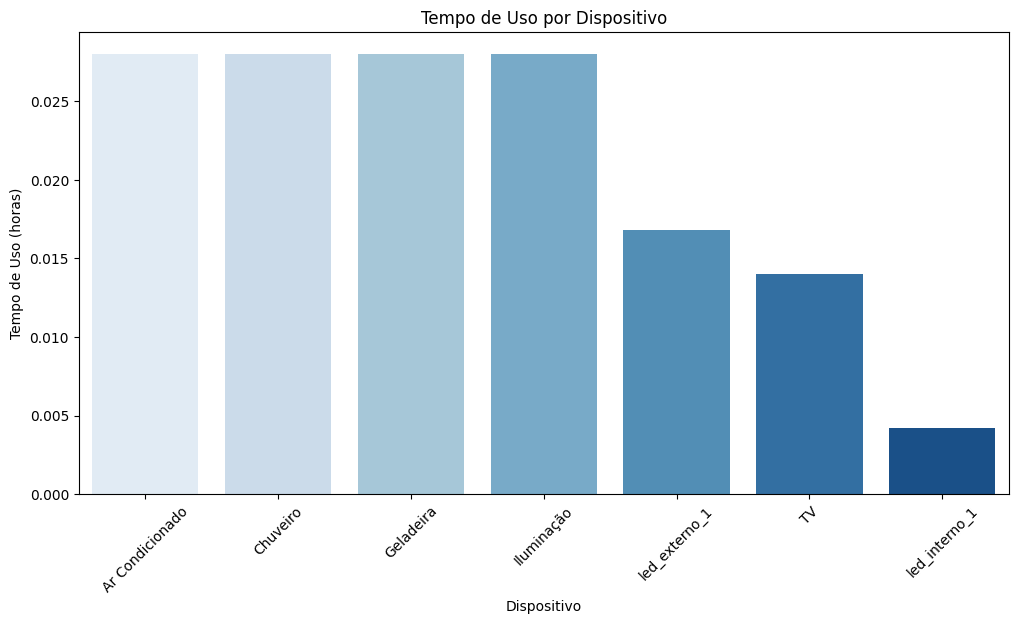

In [6]:
# 4. Gráfico de barras de tempo de uso por dispositivo

# Calcular o tempo total de uso por dispositivo
tempo_uso = df.groupby('dispositivo')['tempo_uso_h'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=tempo_uso.index, y=tempo_uso.values, hue=tempo_uso.index, legend=False, palette='Blues')
plt.title('Tempo de Uso por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Tempo de Uso (horas)')
plt.xticks(rotation=45)
plt.show() 

#### 3.5. Visualização da Distribuição do Consumo de Energia

Nesta subseção, visualizamos a distribuição do consumo de energia utilizando um histograma. A visualização nos ajuda a entender a frequência dos diferentes níveis de consumo de energia e identificar possíveis padrões ou anomalias.

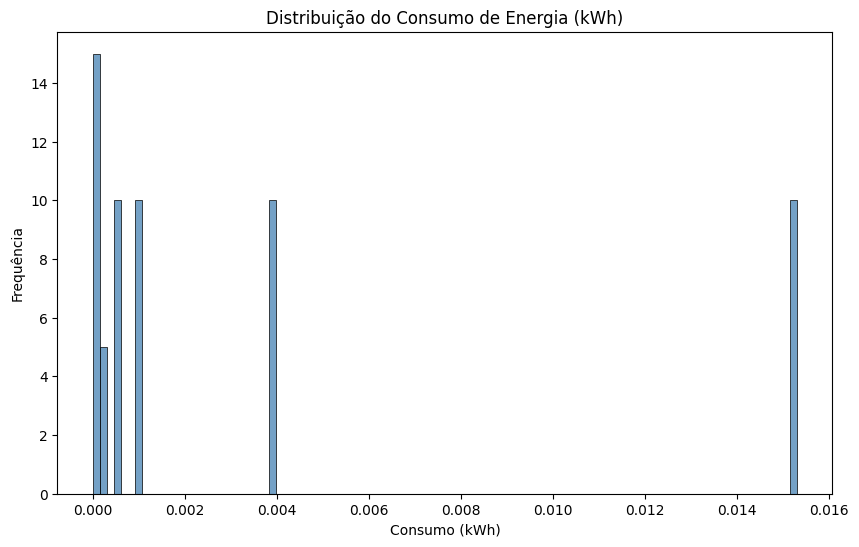

In [7]:
# 5. Histograma do consumo de energia
plt.figure(figsize=(10, 6))
sns.histplot(df['energia_kwh'], bins=100, kde=False, color='steelblue')
plt.title('Distribuição do Consumo de Energia (kWh)')
plt.xlabel('Consumo (kWh)')
plt.ylabel('Frequência')
plt.show()

#### 3.6. Análise do Consumo de Energia por Dispositivo

Nesta subseção, analisamos o consumo de energia por dispositivo. A análise nos ajuda a identificar quais dispositivos consomem mais energia e a entender melhor os padrões de consumo de cada dispositivo.

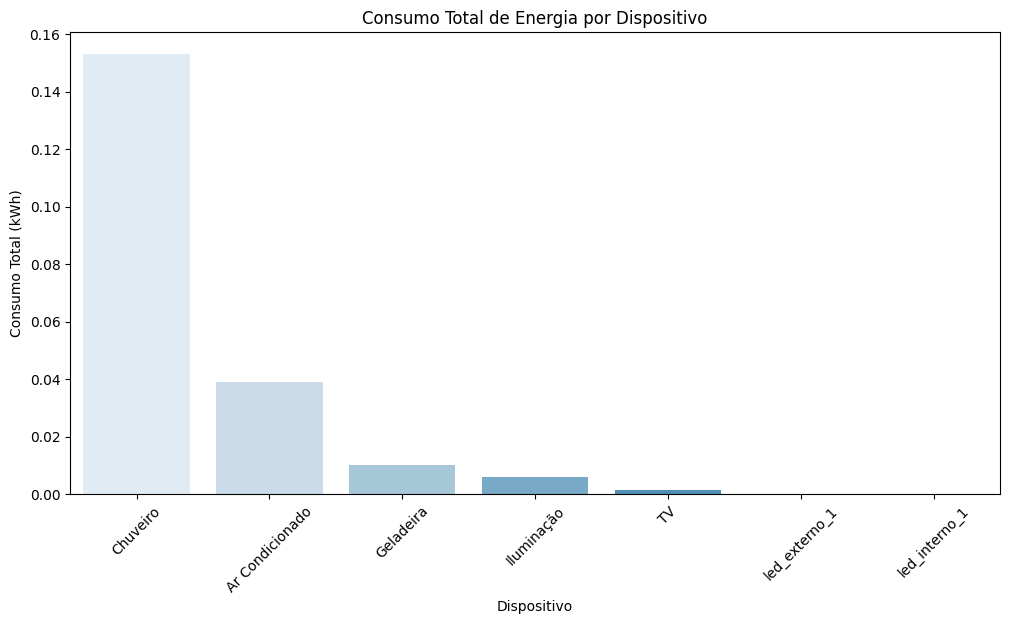

In [8]:
# 6. Gráfico de barras do consumo de energia por dispositivo
consumo_por_dispositivo = df.groupby('dispositivo')['energia_kwh'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=consumo_por_dispositivo.index, y=consumo_por_dispositivo.values, hue=consumo_por_dispositivo.index, legend=False, palette='Blues')
plt.title('Consumo Total de Energia por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Consumo Total (kWh)')
plt.xticks(rotation=45)
plt.show()



#### 3.7. Distribuição dos Dispositivos

Nesta subseção, visualizamos a distribuição dos dispositivos utilizando um gráfico de barras. A visualização nos ajuda a entender a frequência de uso dos diferentes dispositivos e identificar quais são mais utilizados.

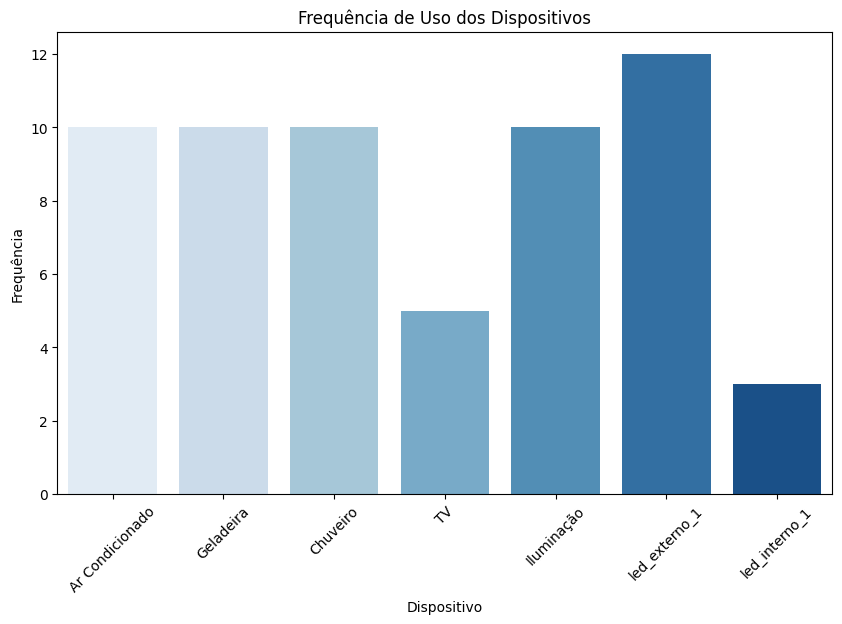

In [9]:
# 7. Distribuição dos dispositivos
plt.figure(figsize=(10, 6))
sns.countplot(x='dispositivo', data=df, hue='dispositivo', legend=False, palette='Blues')
plt.title('Frequência de Uso dos Dispositivos')
plt.xlabel('Dispositivo')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()


#### 3.8. Análise da Relação entre Consumo e Tempo

Nesta subseção, analisamos a relação entre o consumo de energia e o tempo. A análise nos ajuda a entender como o consumo de energia varia ao longo do dia e identificar possíveis padrões de uso. Utilizamos um gráfico de linha para visualizar a média de consumo de energia por hora do dia.

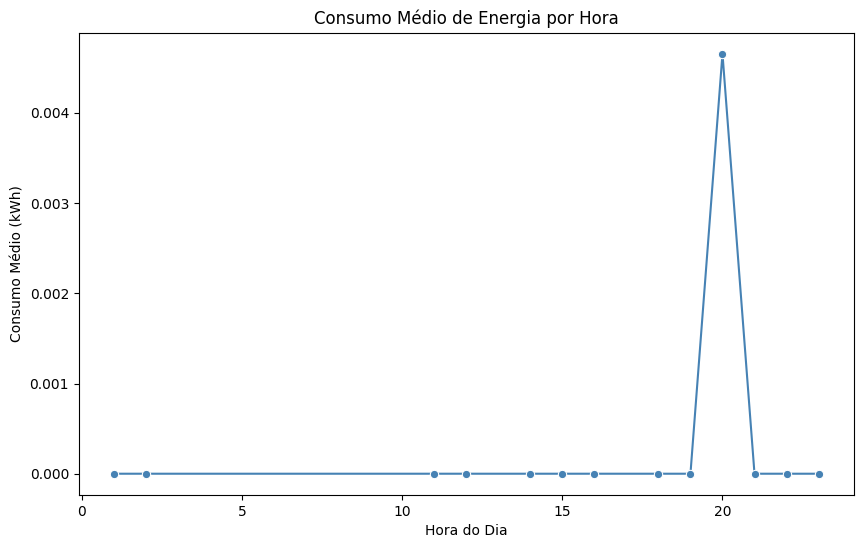

In [10]:
# 8. Análise da relação entre consumo e tempo (utilize uma janela de tempo apropriada para melhor visualização)
df['hora'] = df['timestamp'].dt.hour
df_agregado = df.groupby('hora')['energia_kwh'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='hora', y='energia_kwh', data=df_agregado, marker='o', color='steelblue')
plt.title('Consumo Médio de Energia por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Consumo Médio (kWh)')
plt.show()


### 4. Conclusões

Nesta seção, apresentamos as principais conclusões obtidas a partir da análise exploratória de dados de consumo de energia residencial. As conclusões são baseadas nas visualizações e análises realizadas nas seções anteriores.

#### 4.1. Padrões de Consumo de Energia

- **Distribuição do Consumo**: A distribuição do consumo de energia mostrou que a maioria dos registros de consumo está concentrada em valores mais baixos, com alguns outliers indicando consumos muito altos. Isso sugere que a maioria dos dispositivos consome pouca energia, mas alguns dispositivos específicos podem ter picos de consumo.
- **Consumo por Dispositivo**: A análise do consumo por dispositivo revelou que alguns dispositivos são responsáveis por uma parcela significativa do consumo total de energia. Identificar esses dispositivos pode ajudar a focar em estratégias de otimização de consumo.
- **Tempo de Uso por Dispositivo**: A análise do tempo de uso por dispositivo mostrou que alguns dispositivos são utilizados por períodos mais longos, o que pode contribuir para o consumo elevado de energia.

#### 4.2. Outliers e Dados Faltantes

- **Identificação de Outliers**: A remoção de outliers utilizando o método do intervalo interquartil (IQR) ajudou a limpar os dados e garantir que a análise não fosse distorcida por valores atípicos. A presença de outliers pode indicar problemas de medição ou uso anômalo de dispositivos.
- **Dados Faltantes**: A verificação de valores ausentes mostrou que os dados estavam completos, não havendo lacunas. No entanto, é importante considerar técnicas de imputação de dados faltantes, como o uso do pacote `mice`, para garantir a integridade da análise caso lacunas estejam presentes.

#### 4.3. Relação entre Consumo e Tempo

- **Consumo ao Longo do Dia**: A análise da relação entre consumo e tempo revelou padrões interessantes de uso ao longo do dia. O consumo de energia tende a variar em diferentes horas do dia, com picos em determinados períodos. Isso pode estar relacionado aos hábitos diários dos residentes, como horários de refeições e uso de eletrodomésticos.

#### 4.4. Sugestões para Otimização do Consumo de Energia

- **Foco nos Dispositivos de Alto Consumo**: Dispositivos que consomem muita energia devem ser alvo de estratégias de otimização, como a substituição por modelos mais eficientes ou a implementação de práticas de uso consciente.
- **Monitoramento Contínuo**: Implementar sistemas de monitoramento contínuo pode ajudar a identificar padrões de consumo em tempo real e permitir ações corretivas imediatas.
- **Educação dos Residentes**: Educar os residentes sobre práticas de economia de energia pode contribuir significativamente para a redução do consumo. Informações sobre o impacto do uso de dispositivos específicos e dicas de economia podem ser úteis.

#### 4.5. Novas Possibilidades de Melhoria para o Futuro do Sistema

- **Previsão de Consumo**: Implementar modelos de machine learning para prever o consumo de energia com base em dados históricos pode ajudar a identificar padrões e antecipar picos de consumo, permitindo uma melhor gestão da energia.
- **Automação de Ações**: Desenvolver sistemas de automação que ajustem automaticamente o uso de dispositivos com base em padrões de consumo e horários pode contribuir para a otimização do consumo de energia.
- **Análise de Custo-Benefício**: Realizar análises de custo-benefício para avaliar o impacto financeiro de diferentes estratégias de economia de energia e identificar as mais eficazes.
- **Feedback em Tempo Real**: Fornecer feedback em tempo real para os residentes sobre seu consumo de energia e dicas personalizadas para economizar pode incentivar comportamentos mais conscientes e reduzir o consumo.
- **Expansão do Sistema**: Expandir o sistema para incluir outros tipos de consumo, como água e gás, pode fornecer uma visão mais abrangente do uso de recursos e identificar oportunidades adicionais de economia.

#### 4.6. Considerações Finais

A análise exploratória de dados de consumo de energia residencial forneceu insights valiosos sobre os padrões de uso e identificou áreas potenciais para otimização. A implementação de estratégias baseadas nessas conclusões pode contribuir para a redução do consumo de energia e, consequentemente, para a economia de custos e a sustentabilidade ambiental.

Agradecemos a oportunidade de realizar esta análise e esperamos que as conclusões apresentadas sejam úteis para a tomada de decisões informadas sobre o consumo de energia residencial.